In [10]:
import json
import sys
import glob
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [70]:
DIR = "/home/claudio/hdd/git/bachelorThesis/spatial_resource_waste/"

In [84]:
def plot_df(df, cluster, type_of_data):
    s = df.sum()
    print("Cluster " + cluster + ":")
    df["cpu"] = df["cpu"] / s["cpu"]
    df["ram"] = df["ram"] / s["ram"]
    print(df) 

    df2 = df.copy()
    df["kind"] = "cpu"
    df["percent"] = df["cpu"]
    del df["cpu"]
    del df["ram"]
    
    df2["kind"] = "ram"
    df2["percent"] = df2["ram"]
    del df2["cpu"]
    del df2["ram"]
    
    df = pd.concat([df, df2])
    
    bottom = [0, 0]
    lines = []
    for t in [-1,4,5,6,7,8]:
        lines.append(plt.bar(x=df[df.term==t]["kind"], bottom=bottom,
                height=df[df.term==t]["percent"]))
        bottom += df[df.term==t]["percent"].values
    plt.legend(lines, ["No termination", "EVICT", "FAIL", "FINISH", "KILL", "LOST"],
              bbox_to_anchor=(1,1))
    plt.title(type_of_data + " spatial resource waste (cluster " + cluster + ")")
    plt.show()

Cluster a:
   term       cpu       ram
0    -1  0.006972  0.010447
1     6  0.013963  0.011066
2     5  0.022792  0.028387
3     4  0.134392  0.118184
4     8  0.000091  0.000091
5     7  0.821791  0.831826


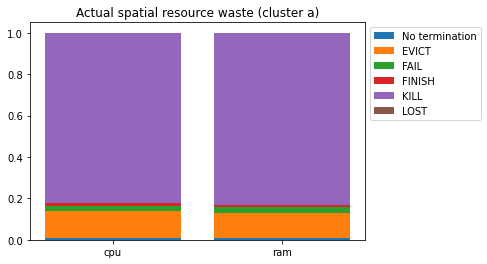

Cluster b:
   term       cpu       ram
0    -1  0.002582  0.004637
1     6  0.025877  0.012231
2     5  0.062950  0.083841
3     4  0.048340  0.073120
4     8  0.000036  0.000027
5     7  0.860215  0.826144


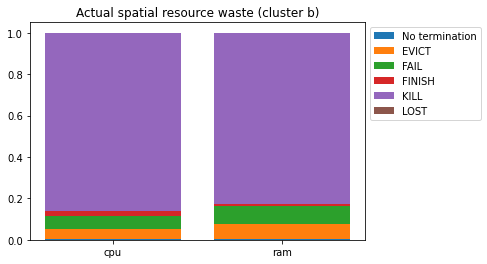

Cluster c:
   term       cpu       ram
0    -1  0.003376  0.003812
1     6  0.029399  0.033249
2     5  0.012294  0.020809
3     4  0.082099  0.080454
4     8  0.000093  0.000088
5     7  0.872740  0.861588


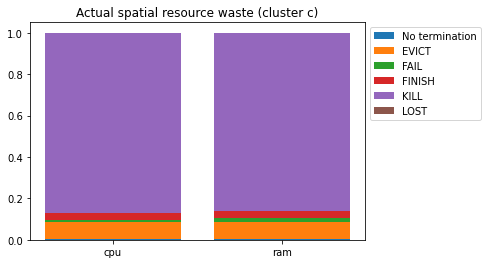

Cluster d:
   term       cpu       ram
0    -1  0.004995  0.004822
1     6  0.008666  0.008914
2     5  0.030288  0.039214
3     4  0.076002  0.090656
4     8  0.000039  0.000030
5     7  0.880011  0.856364


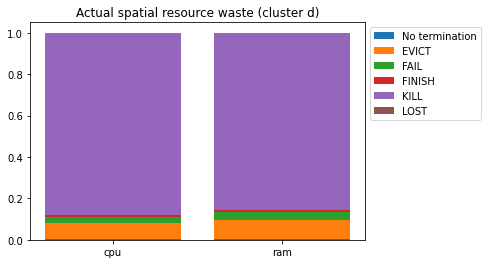

Cluster a:
   term       cpu       ram
0    -1  0.000340  0.001937
1     4  0.028384  0.033991
2     5  0.000583  0.000698
3     6  0.000001  0.000002
4     7  0.966613  0.957991
5     8  0.004079  0.005382


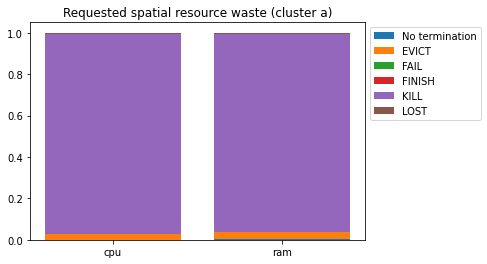

Cluster b:
   term           cpu       ram
0    -1  9.355835e-07  0.000002
1     4  3.364512e-05  0.000047
2     5  3.060723e-05  0.000050
3     6  1.269581e-04  0.000176
4     7  9.109484e-01  0.855737
5     8  8.885947e-02  0.143988


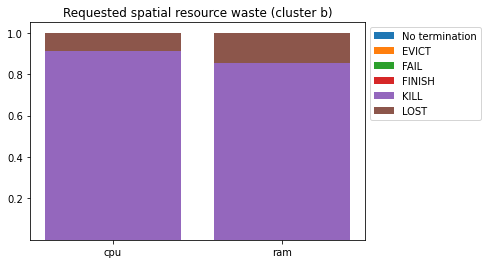

Cluster c:
   term       cpu       ram
0    -1  0.000001  0.000002
1     4  0.000086  0.000070
2     5  0.000013  0.000015
3     6  0.000150  0.000170
4     7  0.824831  0.796980
5     8  0.174918  0.202763


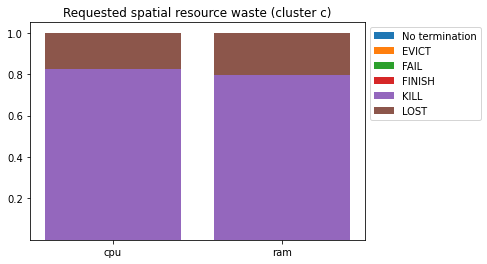

Cluster d:
   term       cpu       ram
0    -1  0.000009  0.000001
1     4  0.000461  0.000064
2     5  0.000237  0.000028
3     6  0.000954  0.000130
4     7  0.954681  0.979276
5     8  0.043658  0.020502


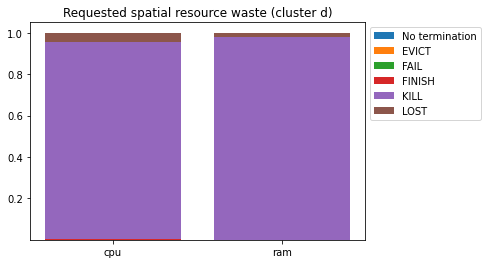

Cluster e:
   term           cpu           ram
0    -1  1.510196e-04  1.647196e-04
1     4  3.620883e-03  3.212742e-03
2     5  5.137287e-04  4.737717e-04
3     6  1.672195e-02  1.310360e-02
4     7  9.789918e-01  9.830448e-01
5     8  6.259843e-07  3.428963e-07


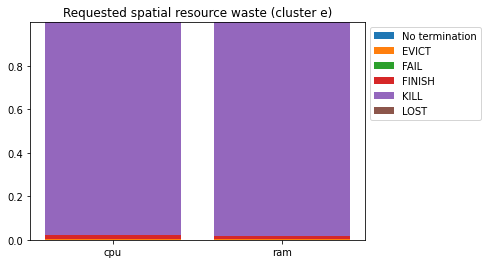

Cluster f:
   term       cpu       ram
0    -1  0.000001  0.000003
1     4  0.000080  0.000135
2     5  0.000009  0.000021
3     6  0.000133  0.000218
4     7  0.943965  0.902279
5     8  0.055811  0.097345


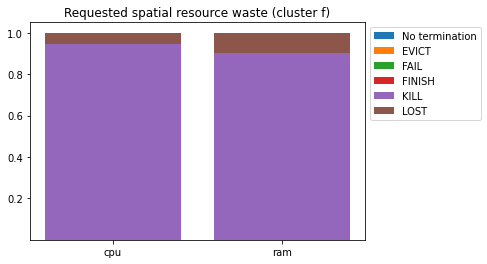

Cluster g:
   term       cpu       ram
0    -1  0.000013  0.000007
1     4  0.000340  0.000253
2     5  0.000044  0.000039
3     6  0.001761  0.001667
4     7  0.273768  0.309543
5     8  0.724074  0.688491


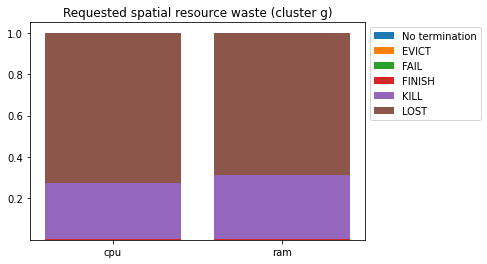

Cluster h:
   term       cpu           ram
0    -1  0.000001  2.221178e-07
1     4  0.000060  7.513351e-06
2     5  0.000009  1.435151e-06
3     6  0.000156  1.872738e-05
4     7  0.789101  9.771332e-01
5     8  0.210673  2.283888e-02


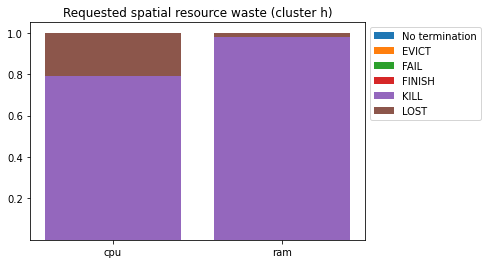

In [85]:
for cluster in "abcd":
    df = pd.read_csv(glob.glob(DIR + cluster + "_actual/part-*")[0], header=None,
                    names=["term", "cpu", "ram"])
    plot_df(df, cluster, "Actual")
    
for cluster in "abcdefgh":
    data = None
    with open(DIR + cluster + "_res_micros_requested.json", "r") as f:
        data = json.loads(f.read())
    dfd = {'term': [], 'cpu': [], 'ram': []}
    for term in [-1,4,5,6,7,8]:
        dfd['term'].append(term)
        dfd['cpu'].append(float(data["cpu-" + ("None" if term == -1 else str(term))]))
        dfd['ram'].append(float(data["ram-" + ("None" if term == -1 else str(term))]))
    df = pandas.DataFrame(dfd, columns=['term', 'cpu', 'ram'])
    plot_df(df, cluster, "Requested")